## Linear Regression of Ecommerce Customers
** the data are not real. 

The ecommerce company sells clothing online and in-store style and clothing advice sessions. The customers can go home and order either on mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app or website.

In [32]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
%matplotlib inline

In [33]:
#Read the data
customers = pd.read_csv("Ecommerce Customers")

In [34]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [35]:
#Avg. Session Length: Average session of in-store style advice sessions.
#Time on App: Average time spent on App in minutes
#Time on Website: Average time spent on Website in minutes
#Length of Membership: How many years the customer has been a member.

In [36]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [37]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [38]:
#Explore the data and data analysis

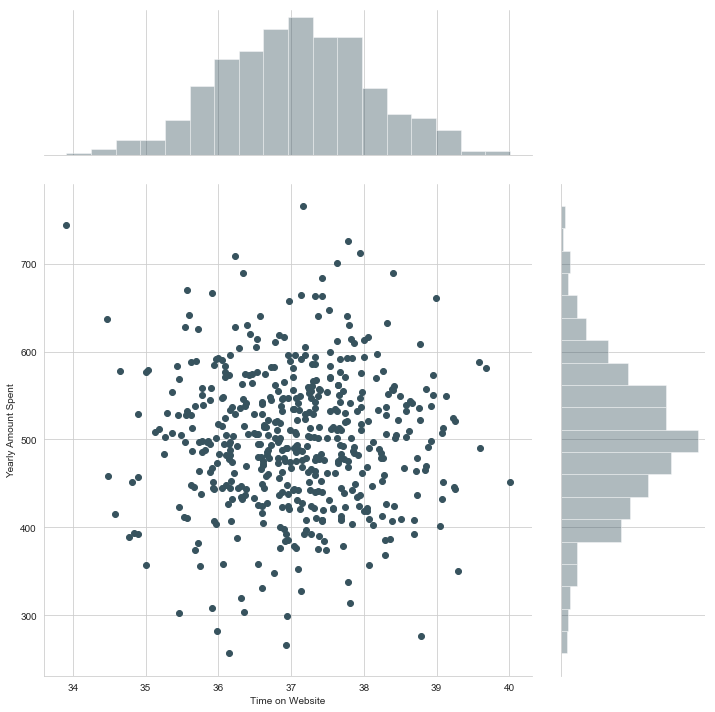

In [39]:
#create a jointpoint to compare the Time on Website and Yearly Amount Spent
sns.jointplot(customers['Time on Website'], customers['Yearly Amount Spent'], 
              data=customers, height=10, ratio=3)

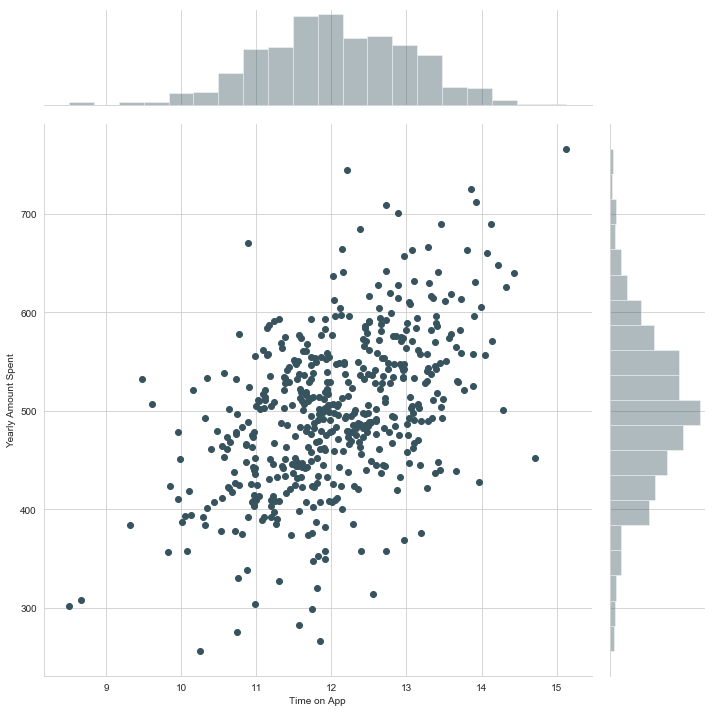

In [40]:
#create a jointpoint to compare the Time on App and Yearly Amount Spent
sns.jointplot(customers['Time on App'], customers['Yearly Amount Spent'],
              data=customers, height=10)

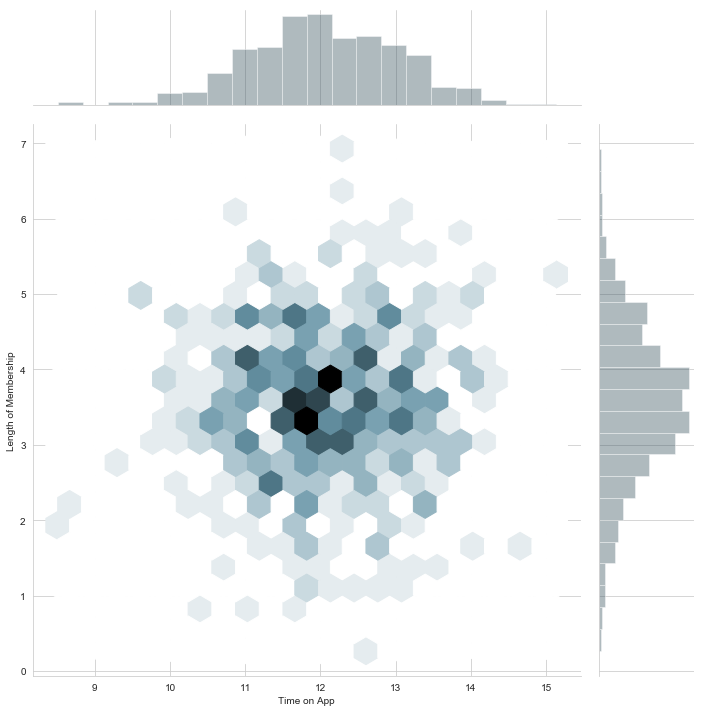

In [41]:
#jointplot to create a hex bin plot comparing Time on App and Length of Membership
sns.jointplot(customers['Time on App'], customers['Length of Membership'],
              data=customers, kind='hex', height=10)

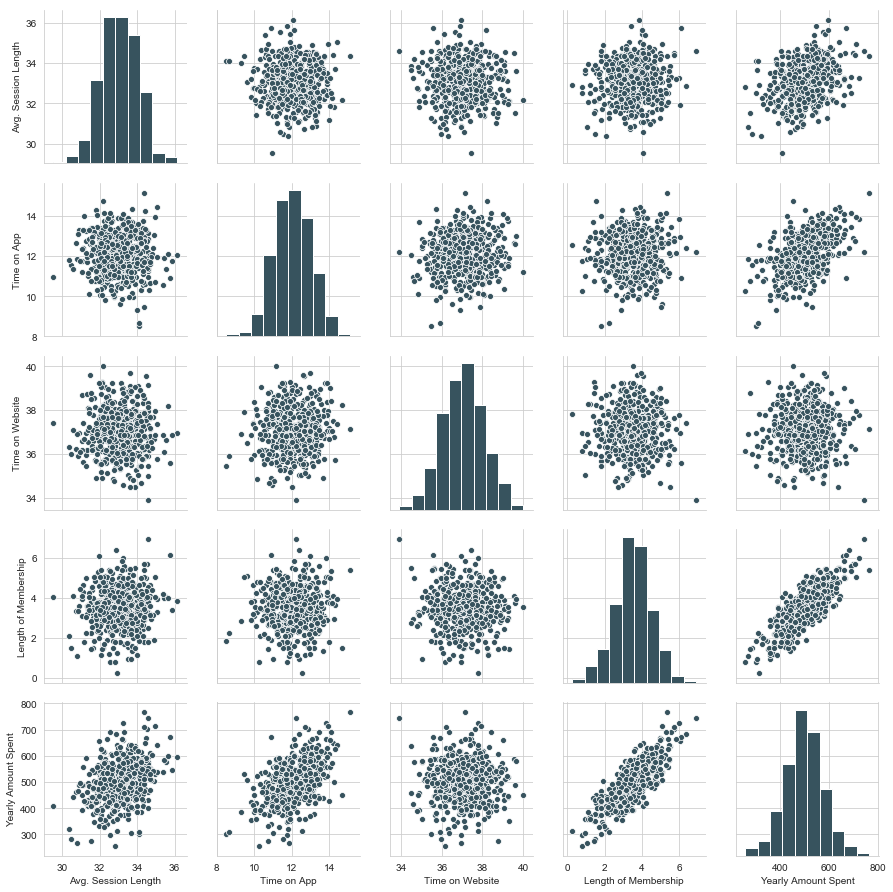

In [42]:
#Create a pairplot
sns.pairplot(customers)

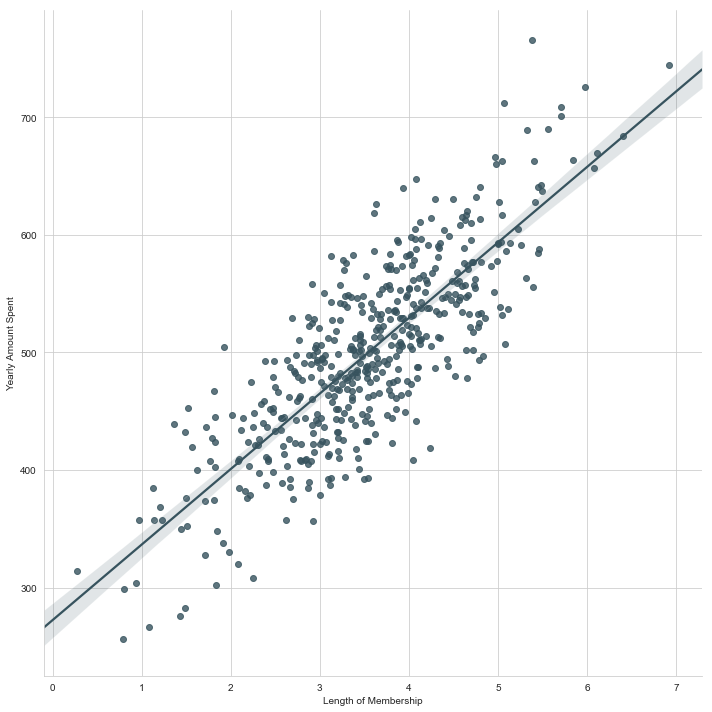

In [43]:
#Create a linear model plot of Yearly Amount Spent vs. Length of Membership
sns.lmplot(y='Yearly Amount Spent', x='Length of Membership', data=customers,
           height=10)

In [44]:
#Training and Testing Data
#Split the data into training and testing sets.
#Set variable X equal to the numerical features of the customers
#and variable y equal to the 'Yearly Amount Spent'

In [96]:
#Check all variables
customers.columns

#numerical features are lengths and times
#email address and avatar are not numerical features

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [97]:
#Split the variables
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [98]:
y = customers['Yearly Amount Spent']

In [99]:
#Use sklearn to split the data into training and testing sets.
#Set test_size=0.3 and random_state=101
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [101]:
#Training the Model
from sklearn.linear_model import LinearRegression

In [102]:
#Linear regression object
lm = LinearRegression()

In [103]:
#fit lm
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
#interception
print(lm.intercept_)

-1047.9327822502385


In [108]:
#Coefficients of the model
coeff_customers = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_customers

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [110]:
#Predict using X_test
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

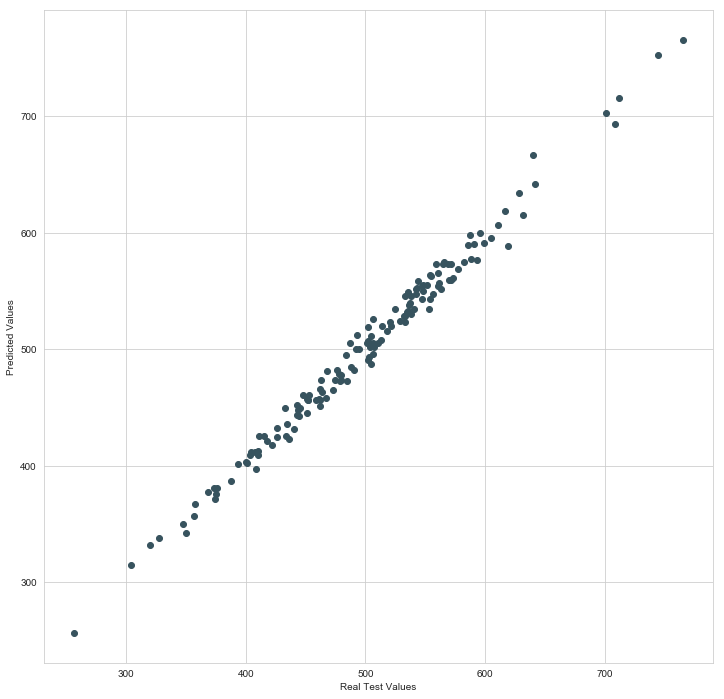

In [112]:
#scatterplot real test values vs. predicted values
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_pred)
plt.xlabel("Real Test Values")
plt.ylabel("Predicted Values")

In [113]:
#Evaluate the model
#MAE, MSE, RMSE
from sklearn import metrics

In [116]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print(mae)

7.228148653430838


In [117]:
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

79.81305165097461


In [118]:
rmse = np.sqrt(mse)
print(rmse)

8.933815066978642


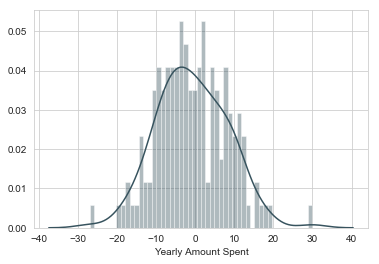

In [123]:
#Hist of the residuals using seaborn
sns.distplot((y_test - y_pred), bins=50)

In [120]:
#Do we focus our efforts on app or website? Is membership time important?
#interpret the coefficients to get an idea

In [121]:
#Dataframe
coeff_customers

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Interpret the coefficient

Interpreting the coefficients: Holding all other features fixed

- 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.

- or 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.

- or 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.

- or 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

**App or Website

Judging on the data above. App has more impact than website. Length of membership has the highest impact on the spending. 

There are other factors at the company that need to be evaluate. E.g. Maybe the company needs the website to push the perfomance of the app. We may need to understand the relationship between length of membership and session time on app and website.

We also need to consider the cost to see which one has the most impact on the profit too.